In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import pandas_datareader as data

In [3]:
start = '1990-01-01'
end = '2022-10-22'

In [4]:
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,0.334821,0.312500,0.314732,0.332589,183198400.0,0.265325
1990-01-03,0.339286,0.334821,0.339286,0.334821,207995200.0,0.267106
1990-01-04,0.345982,0.332589,0.341518,0.335938,221513600.0,0.267997
1990-01-05,0.341518,0.330357,0.337054,0.337054,123312000.0,0.268887
1990-01-08,0.339286,0.330357,0.334821,0.339286,101572800.0,0.270668


In [5]:
df.shape

(8267, 6)

In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.334821,0.312500,0.314732,0.332589,183198400.0,0.265325
1,1990-01-03,0.339286,0.334821,0.339286,0.334821,207995200.0,0.267106
2,1990-01-04,0.345982,0.332589,0.341518,0.335938,221513600.0,0.267997
3,1990-01-05,0.341518,0.330357,0.337054,0.337054,123312000.0,0.268887
4,1990-01-08,0.339286,0.330357,0.334821,0.339286,101572800.0,0.270668


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [9]:
df.head()

,High,Low,Open,Close,Volume
0,0.334821,0.312500,0.314732,0.332589,183198400.0
1,0.339286,0.334821,0.339286,0.334821,207995200.0
2,0.345982,0.332589,0.341518,0.335938,221513600.0
3,0.341518,0.330357,0.337054,0.337054,123312000.0
4,0.339286,0.330357,0.334821,0.339286,101572800.0


In [10]:
MA100 = df.Close.rolling(100).mean()
MA200 = df.Close.rolling(200).mean()

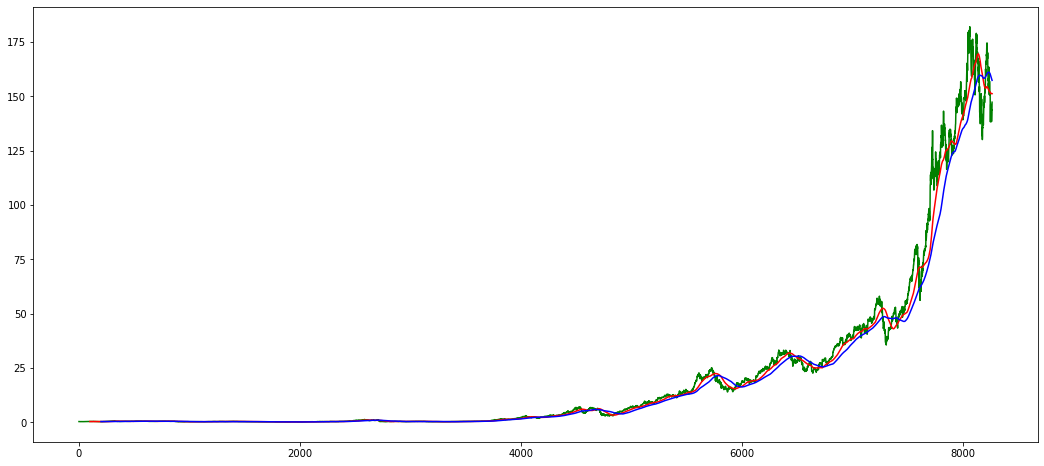

In [11]:
plt.figure(figsize = (18, 8))
plt.plot(df.Close, 'green')
plt.plot(MA100, 'red')
plt.plot(MA200, 'blue')

In [12]:
df.shape

(8267, 5)

In [13]:
# splitting the data into training and testing
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [14]:
print(data_training.shape)
print(data_testing.shape)

(5786, 1)
(2481, 1)


In [15]:
# scaling down the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00869713],
       [0.00878656],
       [0.00883131],
       ...,
       [0.77004163],
       [0.76662178],
       [0.75330018]])

In [17]:
# divide the data into x_train and y_train

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

In [18]:
# converting this into NumPy arrays so that we can feed this into the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
# layer-1
model.add(LSTM(units = 50,
               activation = 'relu',
               return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# layer-2
model.add(LSTM(units = 60,
               activation = 'relu',
               return_sequences = True))
model.add(Dropout(0.3))

# layer-3
model.add(LSTM(units = 80,
               activation = 'relu',
               return_sequences = True))
model.add(Dropout(0.4))

# layer-4
model.add(LSTM(units = 120,
               activation = 'relu'))
model.add(Dropout(0.5))

# dense layer to connect all these layers
model.add(Dense(units = 1))


# getting the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
178/178 [==============================] - 115s 597ms/step - loss: 0.0052
Epoch 2/100
178/178 [==============================] - 111s 621ms/step - loss: 0.0021
Epoch 3/100
 33/178 [====>.........................] - ETA: 1:45 - loss: 0.0015

In [ ]:
# saving the model
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

In [ ]:
# making predictions

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test.shape

In [ ]:
scaler.scale_[0]

In [ ]:
# reshaping the array into 2D NumPy arrays
# y_predicted = y_predicted.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

# print(y_predicted.shape)
# print(y_test.shape)

In [ ]:
scale_factor = 1 / scaler.scale_[0]

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize = (18, 8))
plt.title('prediction graph', fontsize=18)
plt.plot(y_test, 'indianred', label='original price')
plt.plot(y_predicted, 'forestgreen', label='predicted price')
plt.xlabel('time', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.legend()
plt.show()

# Getting the Root Mean Squared Error (RMSE) for accuracy
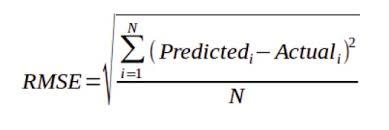

In [ ]:
RMSE = np.sqrt(np.mean(y_predicted - y_test)**2)
RMSE

In [1]:
from keras.models import load_model
model = load_model('keras-prediction-model.h5')

In [3]:
loss = model.history.history['loss']
plt.plot(loss)

AttributeError: 'NoneType' object has no attribute 'history'